In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
btc=pd.read_csv(r"E:\Coding\Anacond_Projects\Crypto_Prices\BTC_USD_2019-07-19_2020-07-18-CoinDesk.csv")
dow=pd.read_csv(r"E:\Coding\Anacond_Projects\Index_Data\DOW_Data_1year.csv")
sen=pd.read_csv(r"E:\Coding\Anacond_Projects\Index_Data\Sensex_Data_1year.csv")

In [3]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-07-19,10603.348873,9693.486511,10740.988702,9282.643000
1,BTC,2019-07-20,10466.260938,10603.343146,10797.638459,10133.094311
2,BTC,2019-07-21,10983.216002,10533.963252,11035.425932,10368.801067
3,BTC,2019-07-22,10551.131633,11004.396573,11096.774419,10314.266182
4,BTC,2019-07-23,10285.639231,10551.127853,10685.248173,10071.522486


In [4]:
btc.dtypes

Currency                object
Date                    object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object

In [5]:
btc.tail(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
355,BTC,2020-07-09,9471.759973,9262.805251,9472.080067,9239.543297
356,BTC,2020-07-10,9236.143254,9444.728112,9449.911243,9173.165154
357,BTC,2020-07-11,9243.175259,9239.473351,9260.349785,9133.962338
358,BTC,2020-07-12,9229.859755,9289.580029,9304.962551,9190.032623
359,BTC,2020-07-13,9286.737042,9243.766253,9349.001062,9170.735360
360,BTC,2020-07-14,9238.993755,9310.395069,9339.806986,9206.291978
361,BTC,2020-07-15,9260.470980,9241.763724,9279.093222,9125.214524
362,BTC,2020-07-16,9211.026433,9261.511425,9275.452440,9167.649721
363,BTC,2020-07-17,9133.777830,9192.623666,9219.426492,9048.084922
364,BTC,2020-07-18,9160.410591,9132.454747,9186.961790,9085.977619


In [6]:
sen[sen.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
65,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN
110,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sen.fillna(method='ffill',inplace=True)

In [8]:
dow[dow.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume


In [9]:
btc[btc.isnull().any(axis=1)]

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)


In [10]:
btc['Date']=pd.to_datetime(btc['Date'])
dow['Date']=pd.to_datetime(dow['Date'])
sen['Date']=pd.to_datetime(sen['Date'])

In [11]:
btc['Prv_Close']=btc['Closing Price (USD)'].shift(periods=1)
dow['Prv_Close']=dow['Adj Close'].shift(periods=1)
sen['Prv_Close']=sen['Adj Close'].shift(periods=1)

In [12]:
btc[btc.isnull().any(axis=1)]

## First row is having NaN value, will take care of it later

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close
0,BTC,2019-07-19,10603.348873,9693.486511,10740.988702,9282.643,NaN


In [13]:
btc['Change']=btc['Prv_Close']-btc['Closing Price (USD)']
sen['Change']=sen['Adj Close']-sen['Prv_Close']
dow['Change']=dow['Adj Close']-dow['Prv_Close']

In [14]:
sen.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change
0,2019-07-18,39204.468750,39204.468750,38861.250000,38897.460938,38897.460938,24100.0,NaN,NaN
1,2019-07-19,39058.730469,39058.730469,38271.351563,38337.011719,38337.011719,19200.0,38897.460938,-560.449219
2,2019-07-22,38333.519531,38333.519531,37890.320313,38031.128906,38031.128906,23000.0,38337.011719,-305.882813
3,2019-07-23,38138.558594,38217.808594,37898.898438,37982.738281,37982.738281,19300.0,38031.128906,-48.390625
4,2019-07-24,37990.230469,38102.839844,37708.410156,37847.648438,37847.648438,16600.0,37982.738281,-135.089843


In [15]:
btc['Change%']=btc['Change']/btc['Prv_Close']*100
sen['Change%']=sen['Change']/sen['Prv_Close']*100
dow['Change%']=dow['Change']/dow['Prv_Close']*100


In [16]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%
0,BTC,2019-07-19,10603.348873,9693.486511,10740.988702,9282.643000,NaN,NaN,NaN
1,BTC,2019-07-20,10466.260938,10603.343146,10797.638459,10133.094311,10603.348873,137.087935,1.292874
2,BTC,2019-07-21,10983.216002,10533.963252,11035.425932,10368.801067,10466.260938,-516.955064,-4.939253
3,BTC,2019-07-22,10551.131633,11004.396573,11096.774419,10314.266182,10983.216002,432.084369,3.934042
4,BTC,2019-07-23,10285.639231,10551.127853,10685.248173,10071.522486,10551.131633,265.492403,2.516246


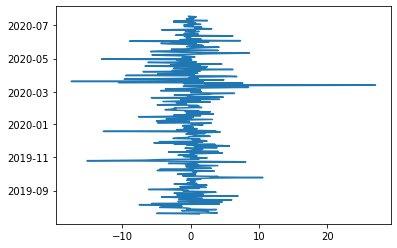

In [17]:
plt.plot(btc['Change%'],btc['Date'])

## Needs axis Correction

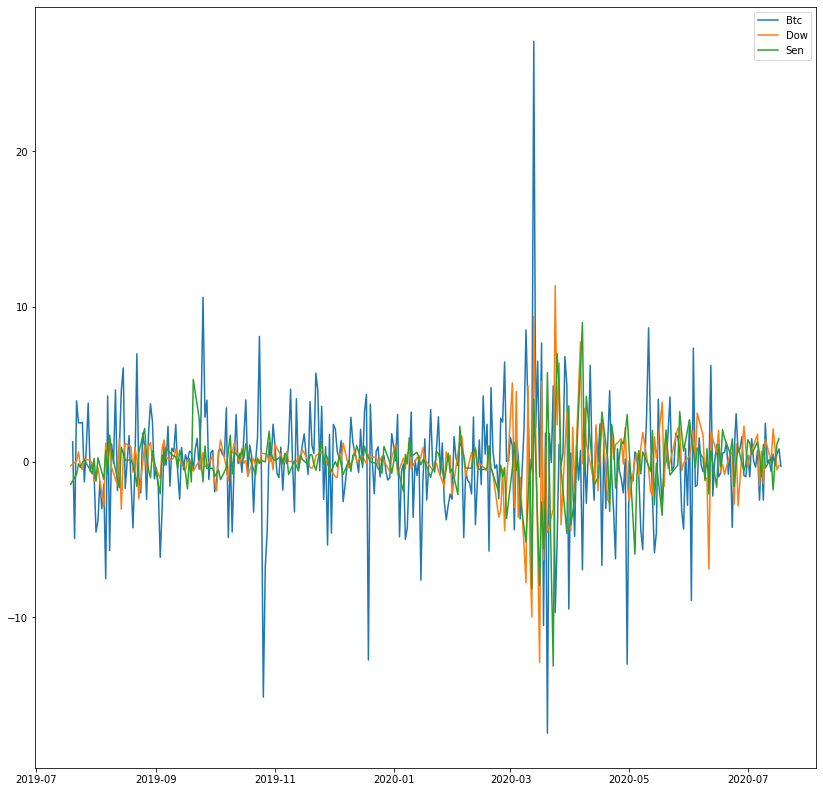

In [18]:
plt.subplots(figsize=(14,14))
plt.plot(btc['Date'],btc['Change%'],label='Btc')
plt.plot(dow['Date'],dow['Change%'],label='Dow')
plt.plot(sen['Date'],sen['Change%'],label='Sen')
plt.legend()

In [19]:
s1 = pd.merge(sen, dow, how='inner', on=['Date'])

In [20]:
check=set(dow['Date'])
sen[~sen['Date'].isin(check)]

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
65,2019-10-27,39201.671875,39241.609375,38718.269531,39058.058594,39058.058594,48600.0,39058.058594,0.000000,0.000000
87,2019-11-28,41161.539063,41163.789063,40996.078125,41130.171875,41130.171875,30900.0,41020.609375,109.562500,0.267091
110,2020-01-01,41607.488281,41607.488281,41184.730469,41253.738281,41253.738281,5600.0,41253.738281,0.000000,0.000000
123,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0,41945.371094,-416.460938,-0.992865
143,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0,41257.738281,-202.046875,-0.489719
234,2020-07-03,36025.378906,36110.210938,35872.378906,36021.421875,36021.421875,16500.0,35843.699219,177.722656,0.495827


In [21]:
btc.loc[(btc['Date'].dt.dayofweek==6 )| (btc['Date'].dt.dayofweek==5) ]

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%
1,BTC,2019-07-20,10466.260938,10603.343146,10797.638459,10133.094311,10603.348873,137.087935,1.292874
2,BTC,2019-07-21,10983.216002,10533.963252,11035.425932,10368.801067,10466.260938,-516.955064,-4.939253
8,BTC,2019-07-27,9812.226351,9897.413446,9924.602563,9643.881829,9897.429352,85.203001,0.860860
9,BTC,2019-07-28,9440.140037,9812.206638,10193.533969,9306.103532,9812.226351,372.086313,3.792068
15,BTC,2019-08-03,10513.911472,10385.212972,10663.618786,10329.196918,10385.200606,-128.710865,-1.239368
...,...,...,...,...,...,...,...,...,...
350,BTC,2020-07-04,9094.324561,9097.683628,9132.985825,9065.858012,9097.797366,3.472805,0.038172
351,BTC,2020-07-05,9124.653534,9067.937487,9190.818987,9051.870726,9094.324561,-30.328973,-0.333493
357,BTC,2020-07-11,9243.175259,9239.473351,9260.349785,9133.962338,9236.143254,-7.032005,-0.076136
358,BTC,2020-07-12,9229.859755,9289.580029,9304.962551,9190.032623,9243.175259,13.315504,0.144058


In [22]:
btc_1=btc.drop(btc[(btc['Date'].dt.dayofweek==6 )| (btc['Date'].dt.dayofweek==5) ].index)

In [23]:
btc_1.loc[(btc_1['Date'].dt.dayofweek==6 )| (btc_1['Date'].dt.dayofweek==5) ]

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%


In [24]:
dow.loc[dow['Change%']==0 ]

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
82,2019-11-12,27701.589844,27770.859375,27635.320313,27691.490234,27691.490234,213670000,27691.490234,0.0,0.0


In [25]:
sen.loc[sen['Change%']==0 ]

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
65,2019-10-27,39201.671875,39241.609375,38718.269531,39058.058594,39058.058594,48600.0,39058.058594,0.0,0.0
110,2020-01-01,41607.488281,41607.488281,41184.730469,41253.738281,41253.738281,5600.0,41253.738281,0.0,0.0


In [26]:
check=set(dow['Date'])
sen_1=sen.drop(sen[~sen['Date'].isin(check)].index)

In [27]:
check=set(sen['Date'])
dow_1=dow.drop(dow[~dow['Date'].isin(check)].index)

In [28]:

sen_1.shape

(239, 10)

In [29]:
dow_1.shape

(239, 10)

In [30]:
sen_1['Change%'].corr(dow_1['Change%'])

0.3561909201381693

In [31]:
dow_1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,2019-07-18,27191.980469,27266.810547,27068.789063,27222.970703,27222.970703,216070000,NaN,NaN,NaN
1,2019-07-19,27246.380859,27342.960938,27145.779297,27154.199219,27154.199219,287690000,27222.970703,-68.771484,-0.252623
2,2019-07-22,27174.179688,27227.769531,27088.900391,27171.900391,27171.900391,216310000,27154.199219,17.701172,0.065188
3,2019-07-23,27231.859375,27368.810547,27204.580078,27349.189453,27349.189453,248850000,27171.900391,177.289062,0.652472
4,2019-07-24,27262.240234,27291.039063,27191.119141,27269.970703,27269.970703,244320000,27349.189453,-79.218750,-0.289657


In [32]:
sen_2=sen_1.shift(periods=1)

In [33]:
sen_2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-18,39204.468750,39204.468750,38861.250000,38897.460938,38897.460938,24100.0,NaN,NaN,NaN
2,2019-07-19,39058.730469,39058.730469,38271.351563,38337.011719,38337.011719,19200.0,38897.460938,-560.449219,-1.440838
3,2019-07-22,38333.519531,38333.519531,37890.320313,38031.128906,38031.128906,23000.0,38337.011719,-305.882813,-0.797879
4,2019-07-23,38138.558594,38217.808594,37898.898438,37982.738281,37982.738281,19300.0,38031.128906,-48.390625,-0.127240
5,2019-07-24,37990.230469,38102.839844,37708.410156,37847.648438,37847.648438,16600.0,37982.738281,-135.089843,-0.355661
6,2019-07-25,37935.019531,38169.871094,37775.511719,37830.980469,37830.980469,18000.0,37847.648438,-16.667969,-0.044040
7,2019-07-26,37831.179688,37978.070313,37690.468750,37882.789063,37882.789063,24100.0,37830.980469,51.808594,0.136948
8,2019-07-29,38043.218750,38043.218750,37519.160156,37686.371094,37686.371094,21100.0,37882.789063,-196.417969,-0.518489
9,2019-07-30,37735.539063,37950.210938,37359.031250,37397.238281,37397.238281,22800.0,37686.371094,-289.132813,-0.767208


In [34]:
dow_1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,2019-07-18,27191.980469,27266.810547,27068.789063,27222.970703,27222.970703,216070000,NaN,NaN,NaN
1,2019-07-19,27246.380859,27342.960938,27145.779297,27154.199219,27154.199219,287690000,27222.970703,-68.771484,-0.252623
2,2019-07-22,27174.179688,27227.769531,27088.900391,27171.900391,27171.900391,216310000,27154.199219,17.701172,0.065188
3,2019-07-23,27231.859375,27368.810547,27204.580078,27349.189453,27349.189453,248850000,27171.900391,177.289062,0.652472
4,2019-07-24,27262.240234,27291.039063,27191.119141,27269.970703,27269.970703,244320000,27349.189453,-79.218750,-0.289657
5,2019-07-25,27247.390625,27298.429688,27062.480469,27140.980469,27140.980469,241420000,27269.970703,-128.990234,-0.473012
6,2019-07-26,27166.000000,27213.699219,27123.250000,27192.449219,27192.449219,233650000,27140.980469,51.468750,0.189635
7,2019-07-29,27192.240234,27275.849609,27178.060547,27221.349609,27221.349609,250850000,27192.449219,28.900390,0.106281
8,2019-07-30,27145.390625,27224.359375,27069.859375,27198.019531,27198.019531,293250000,27221.349609,-23.330078,-0.085705
9,2019-07-31,27244.669922,27281.650391,26719.599609,26864.269531,26864.269531,385150000,27198.019531,-333.750000,-1.227111


In [35]:
sen_2['Change%'].corr(dow_1['Change%'])

-0.22614353081673366

In [36]:
dow_2020=dow_1.loc[(dow_1['Date']>'12-31-2019' )]

In [37]:
dow_2019=dow_1.loc[(dow_1['Date']<='12-31-2019' )]

In [38]:
sen_2020=sen_2.loc[(sen_2['Date']>'12-31-2019' )]

In [39]:
sen_2019=sen_2.loc[(sen_2['Date']<='12-31-2019' )]

In [40]:
dow_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,2019-07-18,27191.980469,27266.810547,27068.789063,27222.970703,27222.970703,216070000,NaN,NaN,NaN
1,2019-07-19,27246.380859,27342.960938,27145.779297,27154.199219,27154.199219,287690000,27222.970703,-68.771484,-0.252623
2,2019-07-22,27174.179688,27227.769531,27088.900391,27171.900391,27171.900391,216310000,27154.199219,17.701172,0.065188
3,2019-07-23,27231.859375,27368.810547,27204.580078,27349.189453,27349.189453,248850000,27171.900391,177.289062,0.652472
4,2019-07-24,27262.240234,27291.039063,27191.119141,27269.970703,27269.970703,244320000,27349.189453,-79.218750,-0.289657


In [41]:
sen_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
1,2019-07-18,39204.468750,39204.468750,38861.250000,38897.460938,38897.460938,24100.0,NaN,NaN,NaN
2,2019-07-19,39058.730469,39058.730469,38271.351563,38337.011719,38337.011719,19200.0,38897.460938,-560.449219,-1.440838
3,2019-07-22,38333.519531,38333.519531,37890.320313,38031.128906,38031.128906,23000.0,38337.011719,-305.882813,-0.797879
4,2019-07-23,38138.558594,38217.808594,37898.898438,37982.738281,37982.738281,19300.0,38031.128906,-48.390625,-0.127240
5,2019-07-24,37990.230469,38102.839844,37708.410156,37847.648438,37847.648438,16600.0,37982.738281,-135.089843,-0.355661


In [42]:
sen_2019['Change%'].corr(dow_2019['Change%'])

-0.11828090676771218

In [43]:
sen_2020.shape

(130, 10)

In [44]:
dow_2020.shape

(131, 10)

In [45]:
sen_2020.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
240,2020-07-10,36555.128906,36748.890625,36401.109375,36594.328125,36594.328125,20900.0,36737.691406,-143.363281,-0.390235
241,2020-07-13,36880.660156,37024.199219,36533.960938,36693.691406,36693.691406,16500.0,36594.328125,99.363281,0.271526
242,2020-07-14,36517.281250,36538.101563,35877.421875,36033.058594,36033.058594,14100.0,36693.691406,-660.632812,-1.800399
243,2020-07-15,36314.761719,36810.250000,35894.960938,36051.808594,36051.808594,23500.0,36033.058594,18.750000,0.052036
244,2020-07-16,36401.199219,36524.621094,36038.410156,36471.679688,36471.679688,18500.0,36051.808594,419.871094,1.164633


In [46]:
dow_2020.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
248,2020-07-13,26225.070313,26639.089844,26044.230469,26085.800781,26085.800781,425320000,26075.300781,10.500000,0.040268
249,2020-07-14,26044.169922,26690.519531,25994.980469,26642.589844,26642.589844,401640000,26085.800781,556.789063,2.134453
250,2020-07-15,27009.810547,27071.330078,26692.480469,26870.099609,26870.099609,384900000,26642.589844,227.509765,0.853933
251,2020-07-16,26746.570313,26879.160156,26590.009766,26734.710938,26734.710938,287330000,26870.099609,-135.388671,-0.503864
252,2020-07-17,26774.619141,26808.429688,26619.880859,26671.949219,26671.949219,296460000,26734.710938,-62.761719,-0.234757


In [47]:
sen.loc[(sen['Date']=='01-01-2020' )]

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
110,2020-01-01,41607.488281,41607.488281,41184.730469,41253.738281,41253.738281,5600.0,41253.738281,0.0,0.0


In [48]:
dow_2020=dow_2020.drop(dow_2020[dow_2020['Date']=='2020-07-17' ].index)

In [49]:
dow_2020.shape

(130, 10)

In [50]:
sen_2020['Change%'].corr(dow_2020['Change%'])

-0.23998425351796737

In [51]:
sen_2020_shift=sen_2020.shift(periods=1)

In [52]:
sen_2020_shift['Change%'].corr(dow_2020['Change%'])

0.20588544682123638

In [53]:
sen_2020_shift.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
112,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0,41253.738281,372.902344,0.903924
114,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0,41626.640625,-162.031250,-0.389249
115,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,41464.609375,-787.980469,-1.900369
116,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,40676.628906,192.839844,0.474080


In [54]:
dow_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
116,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000,28538.439453,330.361328,1.157601
117,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000,28868.800781,-233.919922,-0.810286
118,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000,28634.880859,68.500000,0.239219
119,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000,28703.380859,-119.701171,-0.417028
120,2020-01-08,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,291750000,28583.679688,161.410156,0.564693


In [55]:
dow_2020_shift=dow_2020.shift(periods=1)

In [56]:
sen_2020['Change%'].corr(dow_2020_shift['Change%'])

0.3487853710408439

In [57]:
dow_2020_shift.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
116,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000.0,28538.439453,330.361328,1.157601
118,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000.0,28868.800781,-233.919922,-0.810286
119,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000.0,28634.880859,68.500000,0.239219
120,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000.0,28703.380859,-119.701171,-0.417028


In [58]:
sen_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
112,2020-01-02,41340.269531,41649.289063,41328.449219,41626.640625,41626.640625,5300.0,41253.738281,372.902344,0.903924
113,2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900.0,41626.640625,-162.031250,-0.389249
114,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,41464.609375,-787.980469,-1.900369
115,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,40676.628906,192.839844,0.474080
116,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,40869.468750,-51.730469,-0.126575


In [59]:
dow_2019_shift=dow_2019.shift(periods=1)

In [60]:
sen_2019['Change%'].corr(dow_2019_shift['Change%'])

0.10599663426189584

In [61]:
sen_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
1,2019-07-18,39204.468750,39204.468750,38861.250000,38897.460938,38897.460938,24100.0,NaN,NaN,NaN
2,2019-07-19,39058.730469,39058.730469,38271.351563,38337.011719,38337.011719,19200.0,38897.460938,-560.449219,-1.440838
3,2019-07-22,38333.519531,38333.519531,37890.320313,38031.128906,38031.128906,23000.0,38337.011719,-305.882813,-0.797879
4,2019-07-23,38138.558594,38217.808594,37898.898438,37982.738281,37982.738281,19300.0,38031.128906,-48.390625,-0.127240
5,2019-07-24,37990.230469,38102.839844,37708.410156,37847.648438,37847.648438,16600.0,37982.738281,-135.089843,-0.355661


In [62]:
dow_2019_shift.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-18,27191.980469,27266.810547,27068.789063,27222.970703,27222.970703,216070000.0,NaN,NaN,NaN
2,2019-07-19,27246.380859,27342.960938,27145.779297,27154.199219,27154.199219,287690000.0,27222.970703,-68.771484,-0.252623
3,2019-07-22,27174.179688,27227.769531,27088.900391,27171.900391,27171.900391,216310000.0,27154.199219,17.701172,0.065188
4,2019-07-23,27231.859375,27368.810547,27204.580078,27349.189453,27349.189453,248850000.0,27171.900391,177.289062,0.652472


In [63]:
sen_2020_15feb=sen_1.loc[(sen_1['Date']>='02-15-2020' )]
dow_2020_15feb=dow_1.loc[(dow_1['Date']>='02-15-2020' )]

In [64]:
sen_2020_15feb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
144,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0,41055.691406,-161.312500,-0.392911
145,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0,40894.378906,428.621094,1.048117
146,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0,41323.000000,-152.878906,-0.369961
147,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0,41170.121094,-806.890625,-1.959894
148,2020-02-25,40497.718750,40536.000000,40220.589844,40281.199219,40281.199219,7300.0,40363.230469,-82.031250,-0.203233


In [65]:
dow_2020_15feb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
147,2020-02-18,29282.779297,29330.160156,29116.810547,29232.189453,29232.189453,256600000,29398.080078,-165.890625,-0.564291
148,2020-02-19,29312.699219,29409.089844,29274.380859,29348.029297,29348.029297,240640000,29232.189453,115.839844,0.396275
149,2020-02-20,29296.250000,29368.449219,28959.650391,29219.980469,29219.980469,287780000,29348.029297,-128.048828,-0.436312
151,2020-02-24,28402.929688,28402.929688,27912.439453,27960.800781,27960.800781,452580000,28992.410156,-1031.609375,-3.558205
152,2020-02-25,28037.650391,28149.199219,26997.619141,27081.359375,27081.359375,513270000,27960.800781,-879.441406,-3.145265


In [66]:
dow_2020_15feb_shift=dow_2020_15feb.shift(periods=1)

In [67]:
dow_2020_15feb['Change%'].corr(sen_2020_15feb['Change%'])

0.3798979840284883

In [68]:
dow_2020_15feb_shift.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
147,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2020-02-18,29282.779297,29330.160156,29116.810547,29232.189453,29232.189453,256600000.0,29398.080078,-165.890625,-0.564291
149,2020-02-19,29312.699219,29409.089844,29274.380859,29348.029297,29348.029297,240640000.0,29232.189453,115.839844,0.396275
151,2020-02-20,29296.250000,29368.449219,28959.650391,29219.980469,29219.980469,287780000.0,29348.029297,-128.048828,-0.436312
152,2020-02-24,28402.929688,28402.929688,27912.439453,27960.800781,27960.800781,452580000.0,28992.410156,-1031.609375,-3.558205
153,2020-02-25,28037.650391,28149.199219,26997.619141,27081.359375,27081.359375,513270000.0,27960.800781,-879.441406,-3.145265
154,2020-02-26,27159.460938,27542.779297,26890.970703,26957.589844,26957.589844,472450000.0,27081.359375,-123.769531,-0.457029
155,2020-02-27,26526.000000,26775.310547,25752.820313,25766.640625,25766.640625,664980000.0,26957.589844,-1190.949219,-4.417862
156,2020-02-28,25270.830078,25494.240234,24681.009766,25409.359375,25409.359375,915990000.0,25766.640625,-357.281250,-1.386604
157,2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,26703.320313,637200000.0,25409.359375,1293.960938,5.092458


In [69]:
sen_2020_15feb.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
144,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0,41055.691406,-161.312500,-0.392911
145,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0,40894.378906,428.621094,1.048117
146,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0,41323.000000,-152.878906,-0.369961
147,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0,41170.121094,-806.890625,-1.959894
148,2020-02-25,40497.718750,40536.000000,40220.589844,40281.199219,40281.199219,7300.0,40363.230469,-82.031250,-0.203233
149,2020-02-26,40194.890625,40255.390625,39760.390625,39888.960938,39888.960938,9000.0,40281.199219,-392.238281,-0.973750
150,2020-02-27,39947.800781,39947.800781,39423.269531,39745.660156,39745.660156,9600.0,39888.960938,-143.300782,-0.359249
151,2020-02-28,39087.468750,39087.468750,38219.968750,38297.289063,38297.289063,12700.0,39745.660156,-1448.371093,-3.644099
152,2020-03-02,38910.949219,39083.171875,37785.988281,38144.019531,38144.019531,13400.0,38297.289063,-153.269532,-0.400210
153,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0,38144.019531,479.679688,1.257549


In [70]:
sen_2020_mar=sen_1.loc[(sen_1['Date']>'02-29-2020' )]
dow_2020_mar=dow_1.loc[(dow_1['Date']>'02-29-2020' )]

In [71]:
sen_2020_mar.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
152,2020-03-02,38910.949219,39083.171875,37785.988281,38144.019531,38144.019531,13400.0,38297.289063,-153.269532,-0.400210
153,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0,38144.019531,479.679688,1.257549
154,2020-03-04,38715.718750,38791.699219,37846.101563,38409.480469,38409.480469,15300.0,38623.699219,-214.218750,-0.554630
155,2020-03-05,38604.250000,38887.800781,38386.679688,38470.609375,38470.609375,13500.0,38409.480469,61.128906,0.159151
156,2020-03-06,37613.960938,37747.070313,37011.089844,37576.621094,37576.621094,19000.0,38470.609375,-893.988281,-2.323821


In [72]:
dow_2020_mar.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
156,2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,26703.320313,637200000,25409.359375,1293.960938,5.092458
157,2020-03-03,26762.470703,27084.589844,25706.279297,25917.410156,25917.410156,647080000,26703.320313,-785.910157,-2.943118
158,2020-03-04,26383.679688,27102.339844,26286.310547,27090.859375,27090.859375,457590000,25917.410156,1173.449219,4.527648
159,2020-03-05,26671.919922,26671.919922,25943.330078,26121.279297,26121.279297,477370000,27090.859375,-969.580078,-3.578993
160,2020-03-06,25457.210938,25994.380859,25226.619141,25864.779297,25864.779297,599780000,26121.279297,-256.500000,-0.981958


In [73]:
dow_2020_mar['Change%'].corr(sen_2020_mar['Change%'])

0.3741385590009979

In [74]:
dow_2020_mar_shift=dow_2020_mar.shift(periods=1)

In [75]:
dow_2020_mar_shift['Change%'].corr(sen_2020_mar['Change%'])

-0.16134723353065836

In [76]:
sen_1['Change%'].corr(dow_1['Change%'])

0.3561909201381693

In [77]:
sen_2019['Change%'].corr(dow_2019['Change%'])

-0.11828090676771218

In [78]:
sen_2019['Change%'].corr(dow_2019_shift['Change%'])

0.10599663426189584

In [79]:
check=set(dow_1['Date'])
btc_1=btc_1.drop(btc_1[~btc_1['Date'].isin(check)].index)

In [80]:
btc_1.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%
359,BTC,2020-07-13,9286.737042,9243.766253,9349.001062,9170.735360,9229.859755,-56.877287,-0.616231
360,BTC,2020-07-14,9238.993755,9310.395069,9339.806986,9206.291978,9286.737042,47.743287,0.514102
361,BTC,2020-07-15,9260.470980,9241.763724,9279.093222,9125.214524,9238.993755,-21.477225,-0.232463
362,BTC,2020-07-16,9211.026433,9261.511425,9275.452440,9167.649721,9260.470980,49.444547,0.533931
363,BTC,2020-07-17,9133.777830,9192.623666,9219.426492,9048.084922,9211.026433,77.248603,0.838654


In [81]:
dow_1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
248,2020-07-13,26225.070313,26639.089844,26044.230469,26085.800781,26085.800781,425320000,26075.300781,10.500000,0.040268
249,2020-07-14,26044.169922,26690.519531,25994.980469,26642.589844,26642.589844,401640000,26085.800781,556.789063,2.134453
250,2020-07-15,27009.810547,27071.330078,26692.480469,26870.099609,26870.099609,384900000,26642.589844,227.509765,0.853933
251,2020-07-16,26746.570313,26879.160156,26590.009766,26734.710938,26734.710938,287330000,26870.099609,-135.388671,-0.503864
252,2020-07-17,26774.619141,26808.429688,26619.880859,26671.949219,26671.949219,296460000,26734.710938,-62.761719,-0.234757


TypeError: 'DataFrame' object is not callable

In [83]:
check=set(btc_1['Date'])
dow_1.loc[~(dow_1['Date'].isin(check) )]

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
0,2019-07-18,27191.980469,27266.810547,27068.789063,27222.970703,27222.970703,216070000,NaN,NaN,NaN
63,2019-10-16,26972.310547,27058.339844,26943.289063,27001.980469,27001.980469,214660000,27024.800781,-22.820312,-0.084442


In [84]:
check=set(btc_1['Date'])
dow_for_btc=dow_1.drop(dow_1[~dow_1['Date'].isin(check)].index)

In [ ]:
dow_for_btc.head(10)

In [ ]:
btc_1.head(10)

In [85]:
dow_for_btc['Change%'].corr(btc_1['Change%'])

0.047083589999351395

In [86]:
dow_for_btc_mar=dow_for_btc.loc[(dow_for_btc['Date']>'02-29-2020' )]
btc_mar=btc_1.loc[(btc_1['Date']>'02-29-2020' )]
btc_2020=btc_1.loc[(btc_1['Date']>'01-01-2020' )]
btc_2019=btc_1.loc[(btc_1['Date']<'01-01-2020' )]

In [87]:
dow_for_btc_mar['Change%'].corr(btc_mar['Change%'])

0.1998744926177422

In [88]:
dow_for_btc_mar.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
156,2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,26703.320313,637200000,25409.359375,1293.960938,5.092458
157,2020-03-03,26762.470703,27084.589844,25706.279297,25917.410156,25917.410156,647080000,26703.320313,-785.910157,-2.943118
158,2020-03-04,26383.679688,27102.339844,26286.310547,27090.859375,27090.859375,457590000,25917.410156,1173.449219,4.527648
159,2020-03-05,26671.919922,26671.919922,25943.330078,26121.279297,26121.279297,477370000,27090.859375,-969.580078,-3.578993
160,2020-03-06,25457.210938,25994.380859,25226.619141,25864.779297,25864.779297,599780000,26121.279297,-256.500000,-0.981958
161,2020-03-09,24992.359375,24992.359375,23706.070313,23851.019531,23851.019531,750430000,25864.779297,-2013.759766,-7.785722
163,2020-03-11,24604.630859,24604.630859,23328.320313,23553.220703,23553.220703,663960000,25018.160156,-1464.939453,-5.855504
164,2020-03-12,22184.710938,22837.949219,21154.460938,21200.619141,21200.619141,908260000,23553.220703,-2352.601562,-9.988450
165,2020-03-13,21973.820313,23189.759766,21285.369141,23185.619141,23185.619141,843080000,21200.619141,1985.000000,9.362934
166,2020-03-16,20917.529297,21768.279297,20116.460938,20188.519531,20188.519531,770130000,23185.619141,-2997.099610,-12.926546


In [89]:
btc_mar.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%
226,BTC,2020-03-02,8548.948322,8639.592081,8747.725718,8412.723329,8639.591417,90.643095,1.049160
227,BTC,2020-03-03,8923.044398,8549.045999,8977.333203,8491.456295,8548.948322,-374.096076,-4.375931
228,BTC,2020-03-04,8791.112058,8916.739890,8919.263748,8652.809024,8923.044398,131.932340,1.478557
229,BTC,2020-03-05,8756.961062,8791.112073,8852.256660,8682.684594,8791.112058,34.150996,0.388472
230,BTC,2020-03-06,9078.578777,8756.962116,9172.138258,8745.992956,8756.961062,-321.617715,-3.672709
233,BTC,2020-03-09,8166.313894,8925.217518,8925.383039,8163.682472,8925.213488,758.899594,8.502873
235,BTC,2020-03-11,7959.228274,7939.252823,8159.157919,7745.152079,7875.750875,-83.477399,-1.059929
236,BTC,2020-03-12,7955.306284,7959.233654,7984.602488,7591.897235,7959.228274,3.921990,0.049276
237,BTC,2020-03-13,5800.208905,7954.440008,7977.843680,5568.016690,7955.306284,2155.097379,27.090062
240,BTC,2020-03-16,5355.187374,5304.149075,6115.834478,5076.862093,5304.149952,-51.037421,-0.962217


In [90]:
dow_for_btc_mar_only=dow_for_btc_mar.loc[(dow_for_btc_mar['Date']<'04-01-2020' )]
btc_mar_only=btc_mar.loc[(btc_mar['Date']<'04-01-2020' )]

In [91]:
dow_for_btc_mar_only['Change%'].corr(btc_mar_only['Change%'])

nan

In [92]:
dow_for_btc_mar_only.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prv_Close,Change,Change%
156,2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,26703.320313,637200000,25409.359375,1293.960938,5.092458
157,2020-03-03,26762.470703,27084.589844,25706.279297,25917.410156,25917.410156,647080000,26703.320313,-785.910157,-2.943118
158,2020-03-04,26383.679688,27102.339844,26286.310547,27090.859375,27090.859375,457590000,25917.410156,1173.449219,4.527648
159,2020-03-05,26671.919922,26671.919922,25943.330078,26121.279297,26121.279297,477370000,27090.859375,-969.580078,-3.578993
160,2020-03-06,25457.210938,25994.380859,25226.619141,25864.779297,25864.779297,599780000,26121.279297,-256.500000,-0.981958
161,2020-03-09,24992.359375,24992.359375,23706.070313,23851.019531,23851.019531,750430000,25864.779297,-2013.759766,-7.785722
163,2020-03-11,24604.630859,24604.630859,23328.320313,23553.220703,23553.220703,663960000,25018.160156,-1464.939453,-5.855504
164,2020-03-12,22184.710938,22837.949219,21154.460938,21200.619141,21200.619141,908260000,23553.220703,-2352.601562,-9.988450
165,2020-03-13,21973.820313,23189.759766,21285.369141,23185.619141,23185.619141,843080000,21200.619141,1985.000000,9.362934
166,2020-03-16,20917.529297,21768.279297,20116.460938,20188.519531,20188.519531,770130000,23185.619141,-2997.099610,-12.926546


In [93]:
btc_mar_only.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Prv_Close,Change,Change%
226,BTC,2020-03-02,8548.948322,8639.592081,8747.725718,8412.723329,8639.591417,90.643095,1.049160
227,BTC,2020-03-03,8923.044398,8549.045999,8977.333203,8491.456295,8548.948322,-374.096076,-4.375931
228,BTC,2020-03-04,8791.112058,8916.739890,8919.263748,8652.809024,8923.044398,131.932340,1.478557
229,BTC,2020-03-05,8756.961062,8791.112073,8852.256660,8682.684594,8791.112058,34.150996,0.388472
230,BTC,2020-03-06,9078.578777,8756.962116,9172.138258,8745.992956,8756.961062,-321.617715,-3.672709
233,BTC,2020-03-09,8166.313894,8925.217518,8925.383039,8163.682472,8925.213488,758.899594,8.502873
235,BTC,2020-03-11,7959.228274,7939.252823,8159.157919,7745.152079,7875.750875,-83.477399,-1.059929
236,BTC,2020-03-12,7955.306284,7959.233654,7984.602488,7591.897235,7959.228274,3.921990,0.049276
237,BTC,2020-03-13,5800.208905,7954.440008,7977.843680,5568.016690,7955.306284,2155.097379,27.090062
240,BTC,2020-03-16,5355.187374,5304.149075,6115.834478,5076.862093,5304.149952,-51.037421,-0.962217


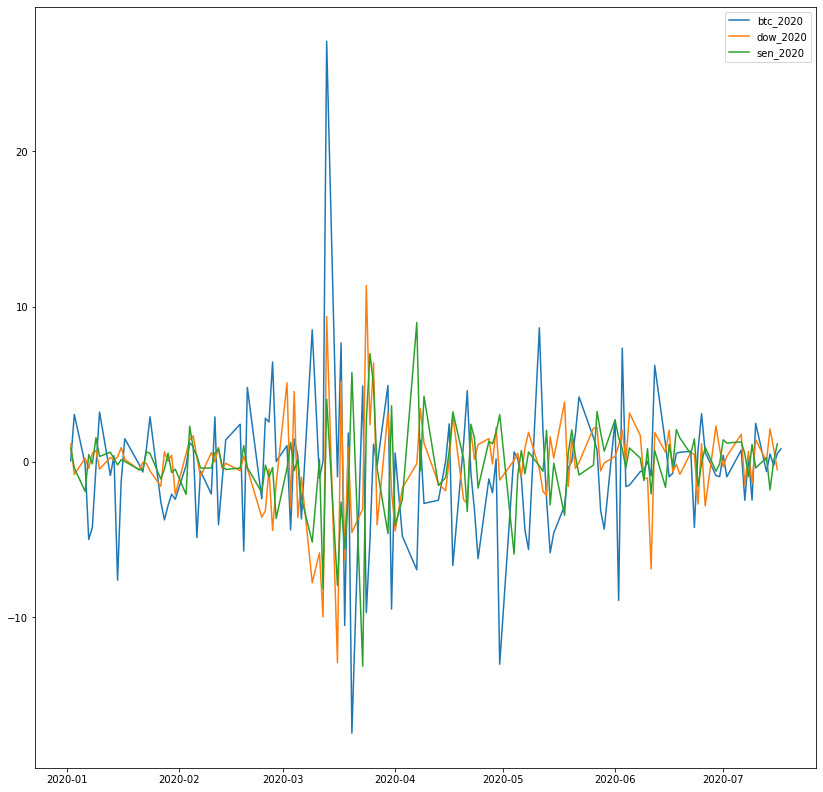

In [94]:
plt.subplots(figsize=(14,14))
plt.plot(btc_2020['Date'],btc_2020['Change%'],label='btc_2020')
plt.plot(dow_2020['Date'],dow_2020['Change%'],label='dow_2020')
plt.plot(sen_2020['Date'],sen_2020['Change%'],label='sen_2020')
plt.legend()

In [ ]:
np.std(btc_2020['Change%'])

In [ ]:
np.std(dow_2020['Change%'])

In [ ]:
np.std(sen_2020['Change%'])

In [ ]:
np.std(sen_2019['Change%'])

In [ ]:
np.std(dow_2019['Change%'])

In [ ]:
np.std(btc_2019['Change%'])

In [ ]:
plt.subplots(figsize=(14,14))
plt.plot(btc_2019['Date'],btc_2019['Change%'],label='btc_2019')
plt.plot(dow_2019['Date'],dow_2019['Change%'],label='dow_2019')
plt.plot(sen_2019['Date'],sen_2019['Change%'],label='sen_2019')
plt.legend()

In [98]:
sen_2020_apr_mar=sen_1.loc[(sen_1['Date']>'02-29-2020' ) & (sen_1['Date']<'05-01-2020' )]
dow_2020_apr_mar=dow_1.loc[(dow_1['Date']>'02-29-2020' ) & (dow_1['Date']<'05-01-2020' )]
btc_2020_apr_mar=btc_1.loc[(btc_1['Date']>'02-29-2020' ) & (btc_1['Date']<'05-01-2020' )]

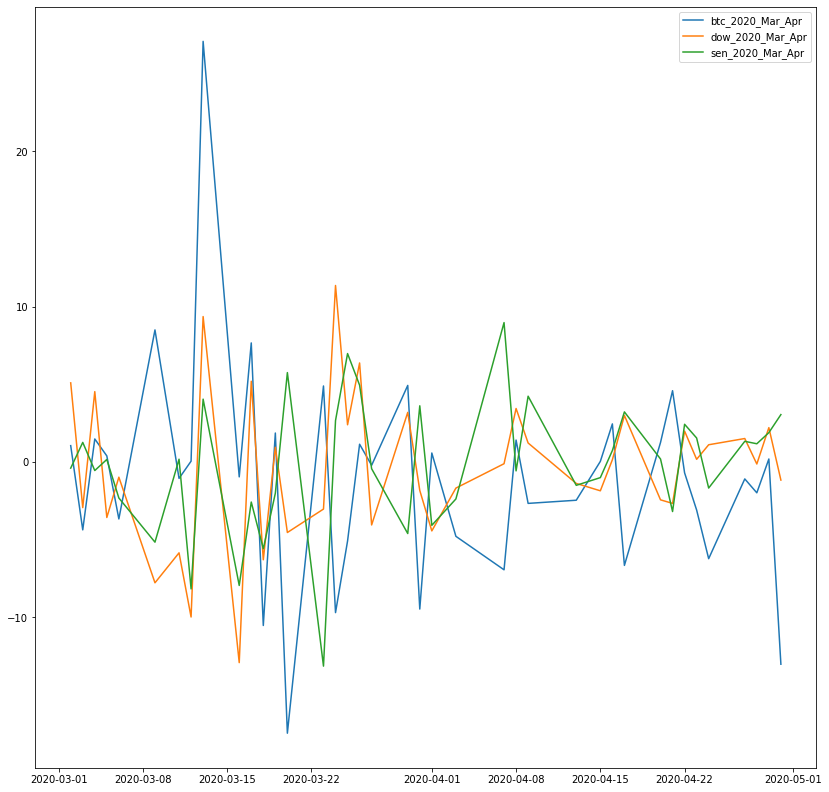

In [99]:
plt.subplots(figsize=(14,14))
plt.plot(btc_2020_apr_mar['Date'],btc_2020_apr_mar['Change%'],label='btc_2020_Mar_Apr')
plt.plot(dow_2020_apr_mar['Date'],dow_2020_apr_mar['Change%'],label='dow_2020_Mar_Apr')
plt.plot(sen_2020_apr_mar['Date'],sen_2020_apr_mar['Change%'],label='sen_2020_Mar_Apr')
plt.legend()

In [100]:
sen_2019_nov_dec=sen_1.loc[(sen_1['Date']>'10-31-2019' ) & (sen_1['Date']<'01-01-2020' )]
dow_2019_nov_dec=dow_1.loc[(dow_1['Date']>'10-31-2019' ) & (dow_1['Date']<'01-01-2020' )]
btc_2019_nov_dec=btc_1.loc[(btc_1['Date']>'10-31-2019' ) & (btc_1['Date']<'01-01-2020' )]

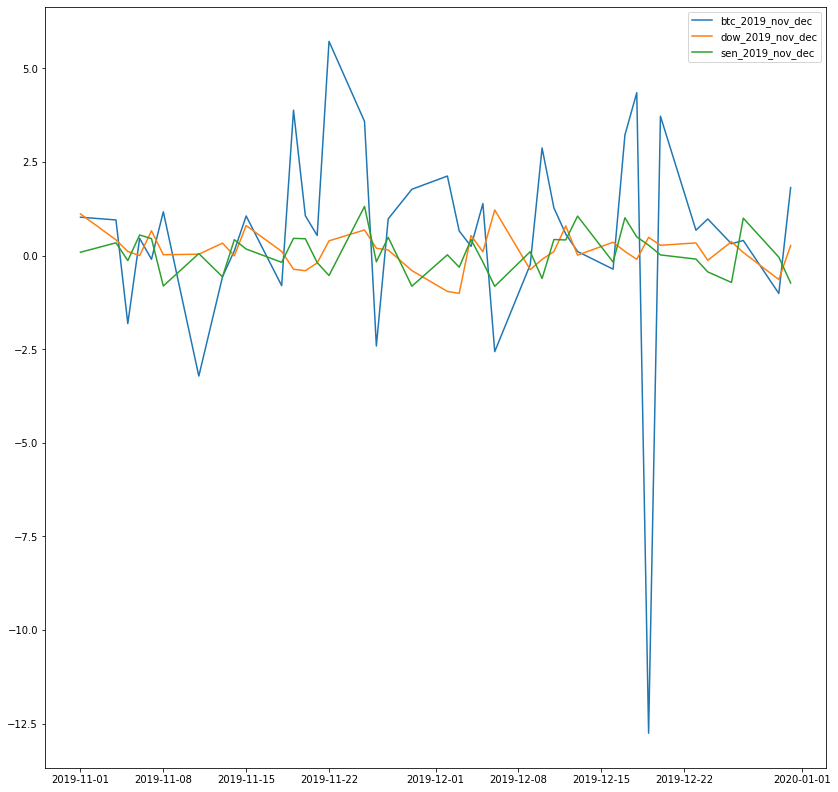

In [101]:
plt.subplots(figsize=(14,14))
plt.plot(btc_2019_nov_dec['Date'],btc_2019_nov_dec['Change%'],label='btc_2019_nov_dec')
plt.plot(dow_2019_nov_dec['Date'],dow_2019_nov_dec['Change%'],label='dow_2019_nov_dec')
plt.plot(sen_2019_nov_dec['Date'],sen_2019_nov_dec['Change%'],label='sen_2019_nov_dec')
plt.legend()